## Introduction

Quantum computing is currently in its NISQ (noisy intermediate-scale quantum) era, which means the quantum computers that have been realized so far, at best, consist of quantum processors with qubits that are not fault-tolerant or coherent for time periods that are sufficiently long to use algorithms that lie in the foundation of the idea of "quantum supremacy". In order to achieve fault-tolerant quantum computers, the main two efforts that go in parallel are improving hardware to fabricate protected qubits that have higher dechorence times and increased fidelities, while on the computational side, error correction plays a critical role. 

This tutorial is created for students, scientists, researchers who have an interest in the field of quantum computing and quantum information and would like to learn about quantum error correction while eventually challenging themselves to the state-of-the-art questions in quantum error correction. 
In my learning journey, delving into the depths of a textbook led me to examples that were more linear algebra based than examples that provided me with practical computing experience. Using platforms such as Qiskit, which is a great resource for those with limited background in quantum computing and quantum mechanics, I learned how to use a lot of operations and gates which can be simulated on real quantum hardware. Yet for those, like me at the time, who don’t have the theoretical background in quantum mechanics and quantum information theory, understanding the intuition behind certain operations and choices can be difficult.

For me, understanding the ideas behind algorithms while being able to run them and play around with code has been critical. So, here is a tutorial project on quantum error correction algorithms, that starts from the very beginning, gradually moves higher in complexity and eventually reaching examples on surface and topological error correction codes. 

This notebook is intended for beginners who want to learn more about quantum error correction and don’t know where to start, yet all are welcome to use it as teaching material or a memory-refresher. Background in introductory quantum mechanics is useful but not required. Introduction to Quantum Mechanics by David J. Griffith’s and Principles of Quantum Mechanics by Ramamurti Shankar are two textbooks that may be useful in that regard. 

This tutorial project is inspired by the Qiskit guide created by IBM as well as the Nielsen & Chuang textbook on quantum information and quantum computation. 

# Fundamental Concepts

It is known that in a classical computer, information is stored in bits: 0s and 1s. Similarly, in quantum computing, information is stored in quantum bits (qubits), that can be in two possible basis states, represented with the ket notation (from quantum mechanics, introduced by Paul Dirac): $ |0⟩ $ and $ |1⟩ $.

However, unlike the bit representations in a classical computer, in a quantum computer qubits can exist in a linear combination of these basis states, due to the superposition principle that is introduced in quantum mechanics. The state can be represented by ket $\psi$:

$$ | \psi ⟩ = \alpha |0⟩ + \beta |1⟩ $$

We, however, can not measure a qubit to find it's superposition state, giving us the values for $\alpha$ and $\beta$.

We know from the four fundamental postulates of quantum mechanics that if a particle is in a state |$\psi$⟩, measurement of the variable (corresponding to) $\Omega$, an operator, will yield one of the eigenvalues $\omega$ with probability  P($\omega$) proportional to $⟨\omega | \Psi⟩^2 $ The state of the system will change from $ \Psi $ to $ \omega $ as a result of the measurement. So, when we measure a qubit we get either get one of the basis states: $|0⟩$ or $|1⟩$ with the probability of $|\alpha|^2$ or $|\beta|^2$ respectively.
(More background and mathematical examples can be found in Chapter 4 of Principles of Quantum Mechanics by Shankar. It is strongly advised that the reader familiarizes themselves with the measurement concept, if not familiar already, before moving forward in the tutorial.)


Now, we can go back to thinking about our qubit and not just any particle. For example, if a qubit is in in the state:

$$
\frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \quad 
$$

that means, when measured, it will be observed in the state 0 fifty percent ($\left|\frac{1}{\sqrt{2}}\right|^2$) of the time, and in the state 1 the other fifty percent ($\left|\frac{1}{\sqrt{2}}\right|^2$) of the time.


To visualize this probability distribution, we will construct a basic circuit designed for measuring a qubit. This circuit involves a single qubit, to which a Hadamard gate is applied. The Hadamard gate, being a single qubit gate, changes the qubit state between the Z basis and the X basis. Essentially, the Hadamard gate transforms a qubit's state from a basis state to a superposition of basis states. This transformation enables the creation of quantum superposition and entanglement, which are pivotal features in quantum computation.

In that regard, by running the next cell, we can visualize the circuit that measures our qubit. With this code, we construct a  quantum circuit with one qubit and one classical bit. We apply a Hadamard gate to the qubit, generating a superposition state where the qubit exists in a superposition of basis states. After creating the superposition, we measure the qubit and store the measurement result in the classical bit. Storing the measurement in a classical bit is crucial since qubits, when measured, collapse to a definite state (0 or 1) and storing this outcome in a classical bit allows us to retrieve and process the information. This is essential for utilizing quantum computing results in practical applications. 

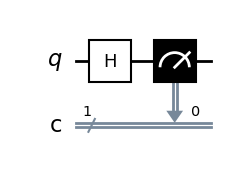

In [15]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, circuit_drawer

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1, 1)

# Apply the Hadamard gate to create a superposition
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Draw the quantum circuit
circuit_drawer(qc, output='mpl', filename='circuit.png', style={'name': 'bw'}, plot_barriers=False, reverse_bits=True)


There should be a circuit diagram above if the previous cell ran successfully. The upper line with a "q" preceding it represents our qubit while the bottom line with a "c" preceding it represents our classical bit. The box on the top left (acting on the qubit since it is on the q-line) with the H represents the Hadamard gate, while the box with the arch and the line crossing it represents the meter that is performing measurement on the qubit. The arrow coming out of the measurement box represents the outcome of the measurement being encoded to the classical bit.

Now that we have a better understanding of what our circuit looks like, we can move on to see the probability distribution of measuring a qubit using the Qiskit framework. The framework, as it is, does not account for noise and simulates an ideal quantum environment. With the following cell we execute our quantum circuit on the simulator, storing the result of the simulation in the variable called "result". Later, we use the .get_counts() function to extract the probability distribution of measurement outcomes from the simulation result. What we are storing in the "counts" variable is the number of occurrences for each possible measurement outcome. So, we plot a histogram of these counts to visualize the likelihood of obtaining each possible result when the qubit is measured. With our previous discussions on probability, we can expect that the counts will be equally distributed between the two basis states, giving a 50% chance for each outcome.

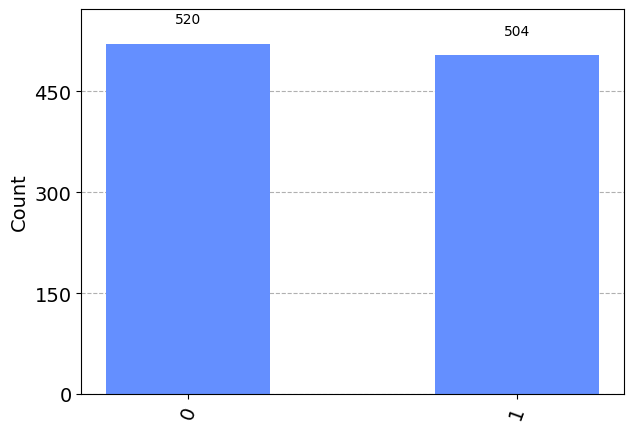

In [16]:
# Use the Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the simulator
result = execute(qc, simulator).result()

# Get the probability distribution from the result
counts = result.get_counts()

# Visualize the probability distribution in a histogram
plot_histogram(counts)

There is inherent numerical noise since the quantum circuit is being simulated on a classical computer, which may cause the small discrepancy in the number of counts for both states, yet we can see that the probabilities are very close to 50% in both cases.

After understanding the probability distribution in measuring quantum states, another essential concept in understanding the fundamentals of quantum computing is understanding the Bloch sphere. The Bloch sphere not only provides an intuitive geometric representation of the state but also is a useful tool in understanding the way quantum gates manipulate states of qubits. Now, we're going to consider the general representation of a qubit in Hilbert space (once again reviewing the mathematical background chapter in Shankar's textbook might be useful if the following expression does not intuitively make sense to the reader).  

$ |\psi\rangle = e^{i\gamma} \left( \cos\left(\frac{\theta}{2}\right) |0\rangle + e^{i\phi} \sin\left(\frac{\theta}{2}\right) |1\rangle \right) $

where, $ \theta $ represents the polar angle on the Bloch sphere and determines how much the state is "tilted" away from the $|0\rangle$ state. It ranges from 0 to $ \pi $.
$ \phi $ is the angle that represents the azimuthal angle on the Bloch sphere and determines the phase relationship between the $ |0\rangle $ and $ |1\rangle $ states. It ranges from 0 to $ 2\pi $.
$ \gamma $ is the global phase factor does not affect the probabilities of measurement outcomes and is often omitted from discussions. The exponential term \( e^{i\gamma} \) is the global phase factor, and since it doesn't change the probabilities of measurement outcomes, it is often ignored or absorbed into other parameters.

This makes our previous equation effectively equivalent to the following simplifed version:

$ |\psi\rangle =  \cos\left(\frac{\theta}{2}\right) |0\rangle + e^{i\phi} \sin\left(\frac{\theta}{2}\right) |1\rangle $

which can easily be represented on the Bloch sphere, as shown below. The purple line is our state while the blue and red dots represents our basis states. This makes it easier for us to represent our superpositions. We can also see how a A $ \pi/2 $-pulse "rotates" our qubit from the 0-state to a superposition state.

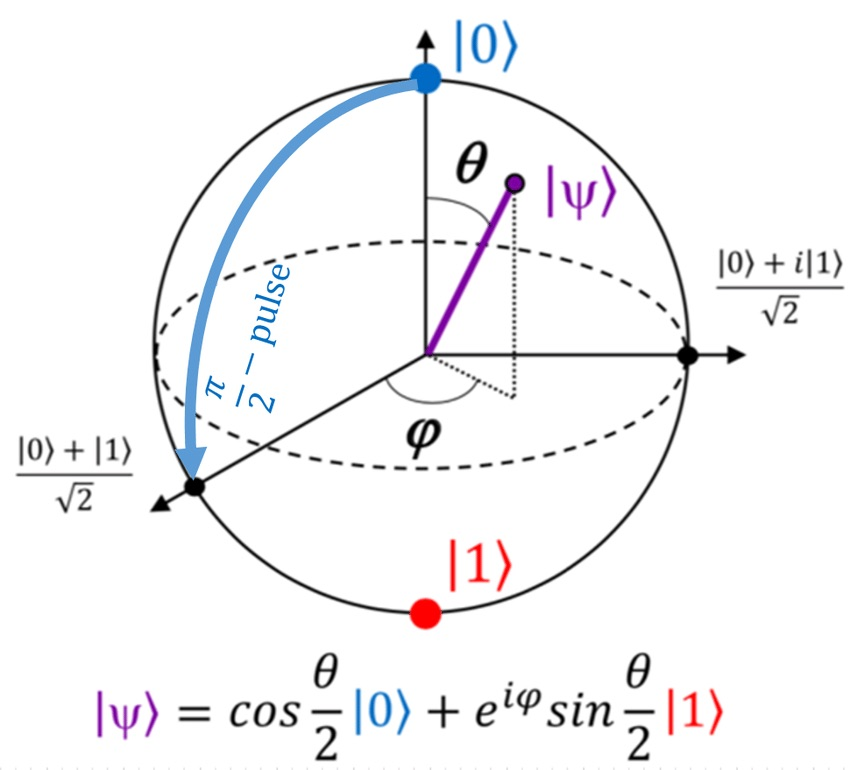

From: Beckers, Arnout & Tajalli, Armin & Sallese, Jean-Michel. (2019). A Review on Quantum Computing: Qubits, Cryogenic Electronics and Cryogenic MOSFET Physics. 

All the examples we had so far have been for single qubits but in practical applications we need more than one qubit we can manipulate. So now we will consider a two-qubti state vector given by:

$ |\psi\rangle = \alpha_{00} |00\rangle + \alpha_{01} |01\rangle + \alpha_{10} |10\rangle + \alpha_{11} |11\rangle 
$

Here, $\alpha_{ij}$ represents the probability amplitude associated with the state $|ij\rangle$, where $i$ and $j$ are the binary values for the first and second qubits, respectively.

Similar, to the one qubit state, the probabilities of measuring each possible outcome are given by:

- Probability of measuring $(|00\rangle): (|\alpha_{00}|^2)$
- Probability of measuring $(|01\rangle): (|\alpha_{01}|^2)$
- Probability of measuring $(|10\rangle): (|\alpha_{10}|^2)$
- Probability of measuring $(|11\rangle): (|\alpha_{11}|^2)$

As always, the probabilities should satisfy the normalization condition: $|\alpha_{00}|^2 + |\alpha_{01}|^2 + |\alpha_{10}|^2 + |\alpha_{11}|^2 = 1$.

After a measurement, the state of the two qubits collapses to the observed outcome. If, for example, $(|10\rangle)$ is measured, the post-measurement state becomes:

 $|\psi_{\text{post}}\rangle = \frac{\alpha_{10}}{\sqrt{|\alpha_{10}|^2}} |10\rangle$

This is the normalized post-measurement state for the given outcome.

We can repeat this process for each possible measurement outcome to find the post-measurement state for each case.

Let's try simulating the two-qubit scenario using the Qiskit framework, like we did with the one-qubit scenario earlier. Here "q0" and "q1" lines represent our two qubits and the H box on each line are Hadamard gates applied to the qubits, creating superposition. We once again map the outcome of our measurements to classical bits, where the 2 on the left side of the classical bit line show that we have two classical bits we can encode information into, 0 and 1 being their indices. So, our measurement from "q0" is mapped onto "c0", while our measurement from "q1" is mapped onto "c1". Here is the code to visualize the circuit:

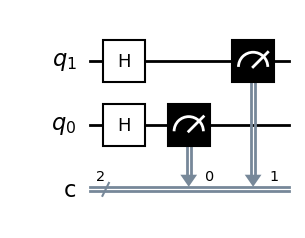

In [17]:
# Create a quantum circuit with two qubits
qc = QuantumCircuit(2, 2)

# Apply the Hadamard gate on both qubits to create a superposition
qc.h(0)
qc.h(1)

# Measure the qubits
qc.measure([0, 1], [0, 1])

# Draw the quantum circuit
circuit_drawer(qc, output='mpl', filename='circuit.png', style={'name': 'bw'}, plot_barriers=False, reverse_bits=True)

Next, we simulate the circuit and plot the counts in a histogram to see our probability distribution, just like we did in the single qubit case. We expect a 25% probability for each state with an error margin for numerical noise.

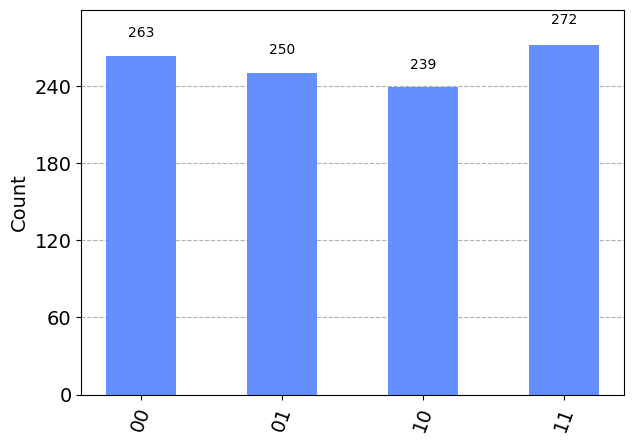

In [18]:
# Use the Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the simulator
result = execute(qc, simulator).result()

# Get the probability distribution from the result
counts = result.get_counts()

# Visualize the probability distribution in a historgram
plot_histogram(counts)

The counts for all qubits should be around 250 as we have 1000 counts total. 

# Important Gates

Now that we are more comfortable with creating and measuring simple circuits, we can start creating more complicated circuits that make use of gates that manipulate states of qubits, crucial in implementing quantum algorithms.

### Hadamard Gate

We recently used the Hadamard gate to create superposition. Here is the matrix representation of the gate: $
H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$
For those who have a background in quantum mechanics but not computation, it might be helpful to think about gates as operators.


Below is the visualization of the Hadamard gate on a Bloch sphere. Especially looking at the matrix representation, we can see that it produces a rotation of the sphere about the y-axis by 90 degrees, followed by a rotation about the x-axis by 180 degrees:

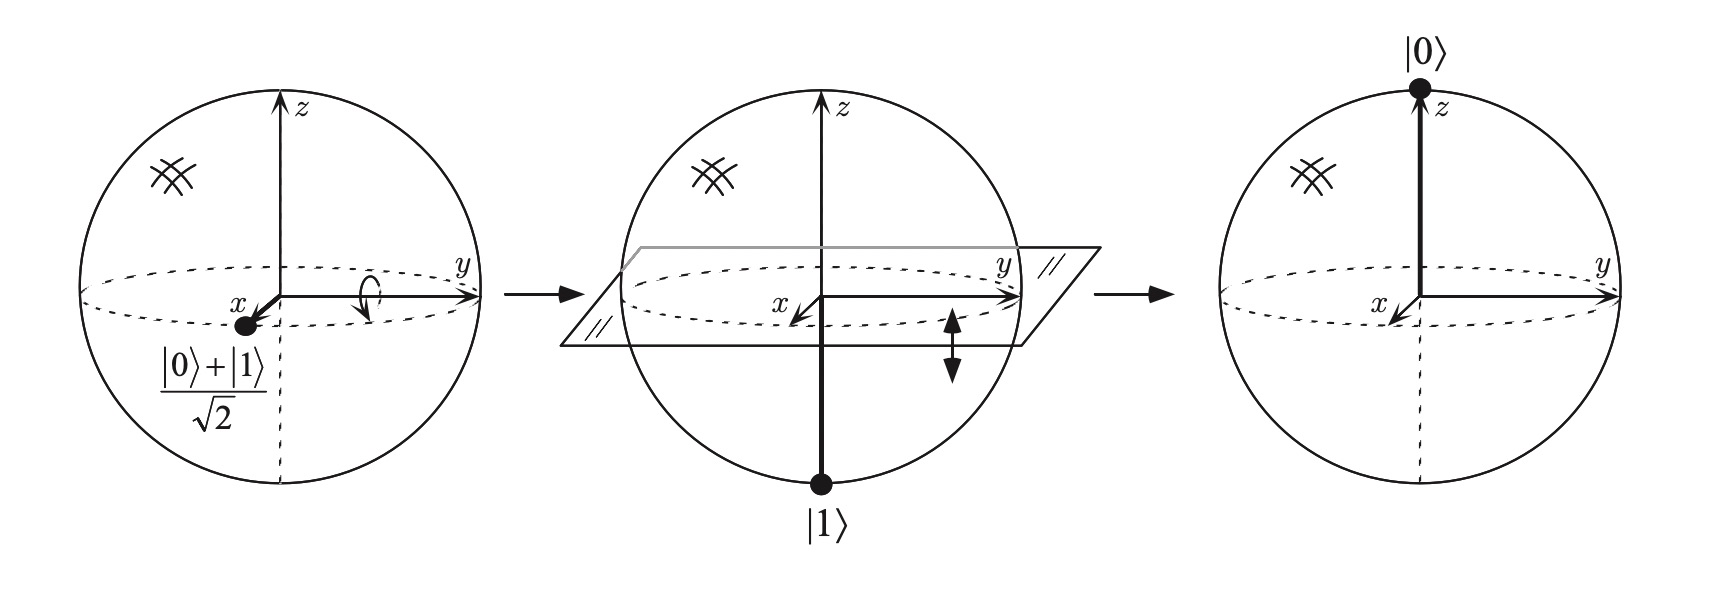

Nielsen, M.A. & Chuang, I.L., 2011. Quantum Computation and Quantum Information: 10th Anniversary Edition, Cambridge University Press.

Note about the Hadamard gate: Both looking at the matrix representation ($ H * H = I $) and the visual representation on the Bloch sphere we can see that applying the Hadamard gate twice leaves the state unaltered. Looking at the Bloch sphere representation we can see that our state $ \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle ) $ becomes $ |0\rangle $. When we apply the Hadamard gate to $ |0\rangle $, we can see that the resulting state is $ \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle ) $. A similar exercise for the reader can be applying the Hadamard gate to the $ \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle ) $ state and then to $ |1\rangle $ to see the relationship.

### Pauli-X Gate

Another widely used gate is the Pauli-X gate, which can be thought about as an analog to the NOT gate in classical computing that flips the state of a bit, changing 0 to 1 and 1 to 0. Similarly, in quantum computing, the Pauli-X gate flips the state of a qubit.

Mathematically, the Pauli-X gate is represented by the matrix:

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

When the Pauli-X gate is applied to a qubit in the state $ |0\rangle $, it transforms it to $ |1\rangle $, and vice versa. The action of the Pauli-X gate on qubit states is given by:

$$
X |0\rangle = |1\rangle \\
X |1\rangle = |0\rangle
$$

Alternatively, you can represent the action of the Pauli-X gate as a bit flip:

$$
|0\rangle \xrightarrow{X} |1\rangle \\
|1\rangle \xrightarrow{X} |0\rangle
$$



### C-NOT Gate

The third gate we will look at is the Controlled-NOT (CNOT) gate. This is a two-qubit gate that flips the target qubit's state only when the control qubit is in the state \( |1 $\rangle$). It is often denoted as $( {CNOT} )$ or $( {CX} )$  .

The matrix representation of the CNOT gate is shown below:

$$
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}
$$

The action of the CNOT gate can be described as follows:

$$
\text{CNOT} |00\rangle = |00\rangle \\
\text{CNOT} |01\rangle = |01\rangle \\
\text{CNOT} |10\rangle = |11\rangle \\
\text{CNOT} |11\rangle = |10\rangle
$$

Another widely used, more visual representation is:

$$
\begin{align*}
|0\rangle \otimes |0\rangle & \xrightarrow{\text{CNOT}} |0\rangle \otimes |0\rangle \\
|0\rangle \otimes |1\rangle & \xrightarrow{\text{CNOT}} |0\rangle \otimes |1\rangle \\
|1\rangle \otimes |0\rangle & \xrightarrow{\text{CNOT}} |1\rangle \otimes |1\rangle \\
|1\rangle \otimes |1\rangle & \xrightarrow{\text{CNOT}} |1\rangle \otimes |0\rangle
\end{align*}
$$
(If the reader is unfamiliar with the $\otimes$ symbol or the concept of tensor products, it might be helpful to review them, not because they are explicitly required in the remainder of the tutorial but because it will help build intuition when thinking about entangled states.)

### Bell States

Another very important idea for the creation of quantum circuits are Bell states. Bell states are a set of four maximally entangled quantum states in the context of Bell's theorem, which addresses the non-locality of quantum mechanics.

The creation of Bell states involves the concept of entanglement, where the states of two or more particles become correlated in a way that the state of one particle cannot be described independently of the state of the others.

The general form of a Bell state, denoted as $(|\Phi^+ \rangle)$, is given by:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

Similarly, the other Bell states are:

- $(|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle))$
- $(|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle))$
- $(|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle))$

These states represent different superpositions of the basis states.


# Introduction to Error Correction 

For all information processing systems, noise must be avoided to get accurate processing procedures. We, thus, try to build systems that avoid noise as much as possible and when we can't we try to eliminate the effect of noise. The key idea in error correction is that to protect a message against the effects of noise. While information can be copied and stored in a straightforward way in classical computing, in quantum computing attempting to replicate an arbitrary quantum state is prohibited due to the unitary evolution of quantum systems, where the act of copying would require a non-unitary operation, leading to a violation of conservation of probability. In other words, attempting to make an identical copy of the unknown state a qubit is in would destroy the information in the original qubit. This is where methods of quantum error correction differ from classical error correction. To achieve our goal of error correction without copying states, we encode the message by adding some redundant information to the message. This ensures that, even if some of the information in the encoded message is corrupted by noise, there will be enough redundancy in the encoded message that it is possible to recover or decode the message to give us all the information that was in the original message.

The three main challenges in quantum error correction are:
1) No Cloning Theorem
The no-cloning theorem poses a challenge for quantum error correction. Attempting to replicate a quantum state three or more times, as one might do in classical error correction, is forbidden by this theorem. Cloning is essential for classical repetition codes, but quantum mechanics prohibits it. Additionally, even if cloning were possible, comparing the three quantum states to identify errors would be impractical.

2) Continuous Errors
In quantum systems, errors are not discrete but rather continuous. A spectrum of different errors may affect a single qubit, making it challenging to precisely determine which error occurred. This difficulty implies a need for infinite precision, which, in turn, demands infinite resources — an impractical requirement.

3) Measurement-Induced Destruction
In classical error correction, the process involves observing the output from a channel and deciding on a decoding procedure. However, in quantum mechanics, the act of measurement generally destroys the quantum state under observation. This presents a significant hurdle as it seemingly makes recovery of the original quantum information impossible.

## Three-qubit bit flip codes

The 3-qubit bit flip code is a simple yet effective quantum error correction code designed to address errors arising from bit flips. Here's how the three qubit bit flip code performs error correction. It is very similar to repetition codes in classical computing in terms of error correcting principles with a few caveats to address the main challenges in quantum error correction mentioned in the introduction part of the error correction section. 
The effectiveness of the 3-qubit bit flip code is captured by the probability of successfully correcting errors. Specifically, when bit flips occur on one or fewer of the three qubits, the error-correction procedure works flawlessly. We take $p$ as the probability of a bit flip occuring and $1-p$ as the probability of a bit flip not occuring. A bit-flip in one or less qubit occurs with probability $(1 − p)^3 + 3p(1 − p)^2 = 1 − 3p^2 + 2p^3$. This makes probability of an error remaining uncorrected $3p^2 - 2p^3$, which is comparable to that of the classical repetition code.

The method we follow in implementing a 3-qubit bit flip code involves three main steps. The first step is encoding the information with redundancy. We encode a single qubit state $ | \psi ⟩ = \alpha |0⟩ + \beta |1⟩ $ to three qubits as $ | \psi ⟩ = \alpha |000⟩ + \beta |111⟩ $. A more convenient way to write that is by denoting:

$ |0\rangle \rightarrow |0_L\rangle \equiv |000\rangle $

$ |1\rangle \rightarrow |1_L\rangle \equiv |111\rangle $

where superpositions of basis states are taken to corresponding superpositions of encoded states. The notation $|0_L\rangle$ and $|1_L\rangle$ indicates that these are the logical $|0\rangle$ and logical $|1\rangle$ states, not the physical zero and one states. 

Once the information is perfectly encoded, each of the three qubits is passed through an independent copy of the bit flip channel. Then, we perform a measurement that tells us if any error has occured in the system and if it has, it states which one has. For the three-qubit bit flip code, we have four error syndromes corresponding to the four projection operators, that represent no error, bit flip on qubit one, bit flip on qubit two and bit flip on qubit three: $P_0$, $P_1$, $P_2$, and $P_3$ respectively. Here is a bra-ket representation:

$P_0 \equiv |000\rangle\langle000| + |111\rangle\langle111|$: No error

$P_1 \equiv |100\rangle\langle100| + |011\rangle\langle011|$: Bit flip on qubit one

$P_2 \equiv |010\rangle\langle010| + |101\rangle\langle101|$: Bit flip on qubit two

$P_3 \equiv |001\rangle\langle001| + |110\rangle\langle110|$: Bit flip on qubit three.

Note that the syndrome contains only information about what error has occurred, and does not allow us to infer anything about the value of a or b, that is, it contains no information about the state so that the state can remain protected.

We use the value of the error syndrome to tell us what procedure to use to recover the initial state. For example, if the error syndrome was 1, indicating a bit flip on the first qubit, then we flip that qubit again, recovering the original state with perfect accuracy. The four possible error syndromes and the recovery procedure in each case are for $P_0$ (no error): do nothing; $P_1$ (bit flip on first qubit): flip the first qubit back to its original state; $P_2$ (bit flip on second qubit): flip the second qubit back to its original state; $P_3$ (bit flip on third qubit): flip the third qubit back to its original state.

The code below implements this method. We first create a circuit with 3 qubit and 3 classical bits, apply a Hadamard gate to create the superposition states and the CNOT gate to encode the same information in all three qubits for redundancy. We then define an error function to introduce an error to our system. This is clearly an artifical error that is introduced so that we can see the implementation of the error code, in practical applications errors are not introduced but are protected against. However, having the no-error case here would be trivial, so we are introducing an error into either qubit 1,2,3 that is decided by the random.choice function in the code. We apply the Pauli-X gate we saw in the previous section to simulate the bit flip error. 

Now that we have our error introduced, we can correct it. So we measure all qubits in the quantum register (q) and store the measurement results in the classical register (c) to determine the error syndrome. Once we know the error qubit, we apply the Pauli-X gate again, to revert the bit flip to its original state, using the circuit.x function. This takes places in the measure and correct function. In order to be able to get the counts to plot the output without error correction there is also a measure function in the code that only measures the qubit outputs but does not correct them. This is not a function you would expect to see in a common error correction code, it is included in the tutorial for pedagogical purposes. 

We finally simulate our results and get the counts to plot the histogram of probabilities. The following cell defines the functions and sketches our circuit and the cell below that uses the functions to add error to the circuit, measure and correct the bit flip, simulate the circuit and display the measurement results in a histogram.



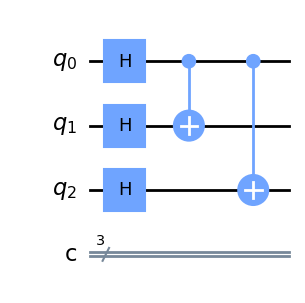

In [19]:
# Import necessary libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Function to create a 3-qubit bit flip code circuit
def create_3qubit_bitflip_circuit():
    # Create a quantum register with 3 qubits
    q = QuantumRegister(3, 'q')
    
    # Create a classical register with 3 bits to measure the qubits
    c = ClassicalRegister(3, 'c')
    
    # Create a quantum circuit using the registers
    qc = QuantumCircuit(q, c)
    
    # Apply Hadamard gate to all qubits
    qc.h(q)
    
    # Apply CNOT gates for encoding
    qc.cx(q[0], q[1])
    qc.cx(q[0], q[2])
    
    return qc

# Function to add error (flip a random qubit)
def add_error(circuit):
    import random
    
    # Choose a random qubit to flip
    error_qubit = random.choice([0, 1, 2])
    
    # Apply X gate to flip the chosen qubit
    circuit.x(error_qubit)
    
    return circuit, error_qubit

# Function to measure qubits and apply error correction
def measure(circuit, error_qubit):
    # Measure all qubits
    circuit.measure(circuit.qregs[0], circuit.cregs[0])
    
    return circuit

# Function to measure qubits and apply error correction
def measure_and_correct(circuit, error_qubit):
    # Measure all qubits
    circuit.measure(circuit.qregs[0], circuit.cregs[0])
    
    # Apply error correction based on the measurement results
    if circuit.cregs[0][error_qubit] == 1:
        circuit.x(error_qubit)
    
    return circuit

# Function to simulate the quantum circuit
def simulate_circuit(circuit, shots=1024):
    # Use the Aer simulator
    simulator = Aer.get_backend('qasm_simulator')
    
    # Execute the circuit and get the result
    result = execute(circuit, simulator, shots=shots).result()
    
    # Get the counts from the result
    counts = result.get_counts(circuit)
    
    return counts



# Create the 3-qubit bit flip code circuit
bitflip_circuit = create_3qubit_bitflip_circuit()

# Display the circuit
bitflip_circuit.draw(output='mpl')


Now, we're going to look at the output from our circuit without the bit flip being corrected. In this case we would expect the count distribution to be skewed towards the state with the introduced error compared to the equal (around 12.5% each) distribution. 

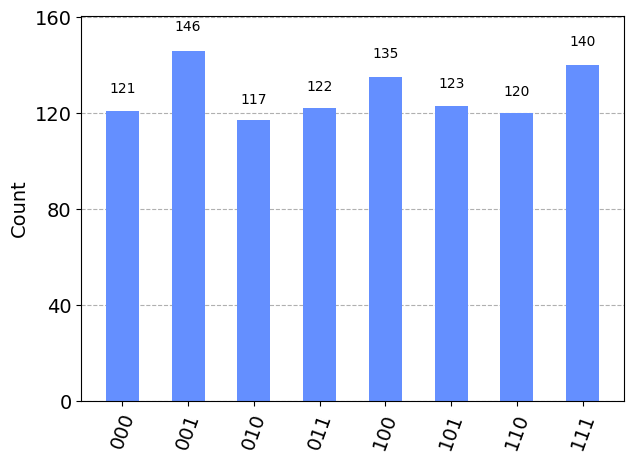

In [20]:
# Create the 3-qubit bit flip code circuit
bitflip_circuit_before = create_3qubit_bitflip_circuit()

# Add error to the circuit
bitflip_circuit_before, error_qubit_before = add_error(bitflip_circuit_before)

# Measure circuit
bitflip_circuit_before = measure(bitflip_circuit_before, error_qubit_before)

# Simulate the circuit before error correction
counts_before = simulate_circuit(bitflip_circuit_before)

# Display the measurement results before error correction
plot_histogram(counts_before)


One state typically has a higher count compared to others, if you don't see such a state the error might be comparable to the numerical noise in that particular run, you can re-run the previous two cells until you feel comfortable with identifying the state that has the error.

Now, we can introduce the error correction method and see the updated distribution. The counts should be equally distributed among the eight states in an ideal situation. Of course, there will be numerical noise that is causing deviations yet it should not be as stark of a difference as we saw in the non-corrected version above.

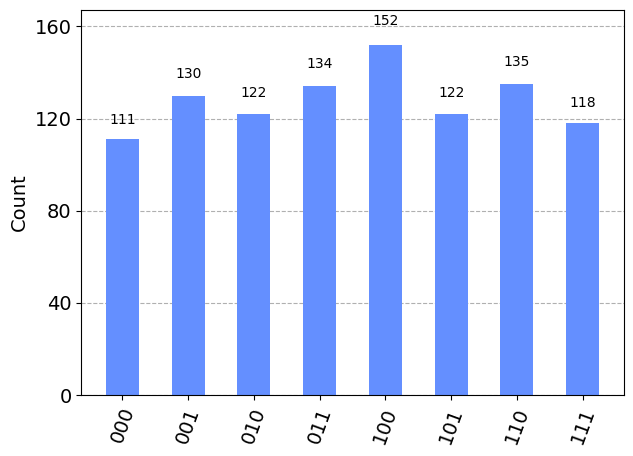

In [21]:
# Create a new 3-qubit bit flip code circuit
bitflip_circuit_after = create_3qubit_bitflip_circuit()

# Add error to the new circuit
bitflip_circuit_after, error_qubit_after = add_error(bitflip_circuit_after)

# Display the circuit after error correction
bitflip_circuit_after.draw(output='mpl')

# Measure and correct
bitflip_circuit_after = measure_and_correct(bitflip_circuit_after, error_qubit_after)

# Simulate the circuit after error correction
counts_after = simulate_circuit(bitflip_circuit_after)

# Display the measurement results after error correction
plot_histogram(counts_after)


## Three-qubit phase flip codes

The three-qubit bit flip error correction code was hopefully a simple and useful introduction to the 3-qubit flip codes. Next, we can look at a three-qubit phase flip codes. In this error model the phase flip operator Z is applied to the qubit with probability $p > 0$, so the state $a|0\rangle+b|1\rangle$ is taken to the state $a|0\rangle - b|1\rangle$ under the phase flip. There is no classical equivalent to the phase flip channel, but the main ideas are very similar to those we used in the three-qubit bit flip code. Now, we are working with the qubit basis consisting of $|+\rangle \equiv (|0\rangle + |1\rangle)/ 2$ and $|-\rangle \equiv (|0\rangle - |1\rangle)/ 2$. With respect to this basis the operator Z takes $|+\rangle$ to $|-\rangle$ and vice versa. Naturally, we use the states $|0_L\rangle \equiv |+++\rangle$ and $|1_L\rangle \equiv |---\rangle$ as logical zero and one states for protection against phase flip errors. All the operations needed for error-correction (encoding, error-detection, and recovery) are performed just as for the bit flip channel, but with respect to the $|+\rangle$, $|-\rangle$ basis instead of the $|0\rangle$, $|1\rangle$ basis. To accomplish this basis change we apply the Hadamard gate and its inverse (also the Hadamard gate as we discussed when we were discussing its matrix form in the introduction section of this tutorial) since the Hadamard gate accomplishes the change back and forth between the $|0\rangle$, $|1\rangle$ and the $|+\rangle$, $|-\rangle$ bases. 

The encoding for the phase flip channel is performed in two steps: first, we encode in three qubits exactly as for the bit flip channel; second, we apply a Hadamard gate to each qubit. 

Next, error-detection is achieved by applying the same projective measurements as before, but conjugated by Hadamard gates: $Pj$ → $Pj' \equiv H^{\otimes3} PjH^{\otimes3}$. Equivalently, syndrome measurement may be performed by measuring the observables $H^{\otimes3} Z_1 Z_2 H^{\otimes3} = X_1 X_2$ and $H^{\otimes3} Z_2 Z_3 H^{\otimes3} = X_2 X_3$. 
We interpret these measurements along similar lines to the measurement of $Z_1 Z_2$ and $Z_2 Z_3$ for the bit flip code. Measurement of the observables $X_1 X_2$ and $X_2 X_3$ corresponds to comparing the sign of qubits one and two, and two and three, respectively. 
Finally, we perform the recovery operation, which is the Hadamard-conjugated recovery operation from the bit flip code. For example if we detected a flip in the sign of the first qubit, then we recover by applying $H X_1 H = Z_1$ to the first qubit. The same procedure applies for other error syndromes for their respective qubits. 
Below is a code that demonstrates the three-qubit phase flip error correction code:

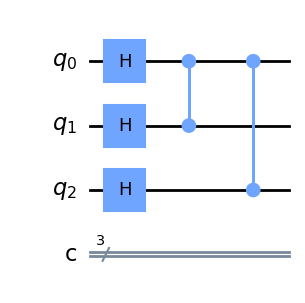

In [25]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector
from qiskit.compiler import transpile  # Add this line for transpile function
import random

# Function to create a 3-qubit phase flip code circuit
def create_3qubit_phaseflip_circuit():
    # Create a quantum register with 3 qubits
    q = QuantumRegister(3, 'q')
    
    # Create a classical register with 3 bits to measure the qubits
    c = ClassicalRegister(3, 'c')
    
    # Create a quantum circuit using the registers
    qc = QuantumCircuit(q, c)
    
    # Apply Hadamard gate to all qubits
    qc.h(q)
    
    # Apply controlled-Z gates for encoding
    qc.cz(q[0], q[1])
    qc.cz(q[0], q[2])
    
    return qc

# Function to add error (phase flip a random qubit)
def add_error_phase(circuit):
    import random
    
    # Choose a random qubit to apply a phase flip
    error_qubit = random.choice([0, 1, 2])
    
    # Apply Z gate to introduce a phase flip on the chosen qubit
    circuit.z(error_qubit)
    
    return circuit, error_qubit

# Function to measure qubits
def measure_phase(circuit):
    # Measure all qubits
    circuit.measure(circuit.qregs[0], circuit.cregs[0])
    
    return circuit

# Function to measure qubits and apply error correction for phase flip code
def measure_and_correct_phase(circuit, error_qubit):
    # Measure all qubits
    circuit.measure(circuit.qregs[0], circuit.cregs[0])
    
    # Apply error correction based on the measurement results
    if circuit.cregs[0][error_qubit] == 1:
        circuit.z(error_qubit)
    
    return circuit

# Function to simulate the quantum circuit for counts
def simulate_circuit_phase(circuit, shots=1024):
    # Use the Aer simulator
    simulator = Aer.get_backend('qasm_simulator')
    # Execute the circuit and get the result
    result = execute(circuit, simulator, shots=shots).result()
    # Get the counts from the result
    counts = result.get_counts(circuit)
    return counts

# Function to visualize the Bloch vector
def visualize_bloch_vector(circuit):
    simulator = Aer.get_backend('statevector_simulator')
    result = simulator.run(transpile(circuit, simulator)).result()
    state_vector = result.get_statevector()
    return plot_bloch_multivector(state_vector)


# Create the 3-qubit phase flip code circuit
phaseflip_circuit = create_3qubit_phaseflip_circuit()

# Display the circuit
phaseflip_circuit.draw(output='mpl')

Above is the circuit design for the three-qubit phase flip error correction method. Once again, we're going to visualize our outputs with and without the implementation of the error-correction method. This time, however, we are not looking at counts but rather the Bloch sphere that was introduced earlier to be able to see the change in phase more clearly. 

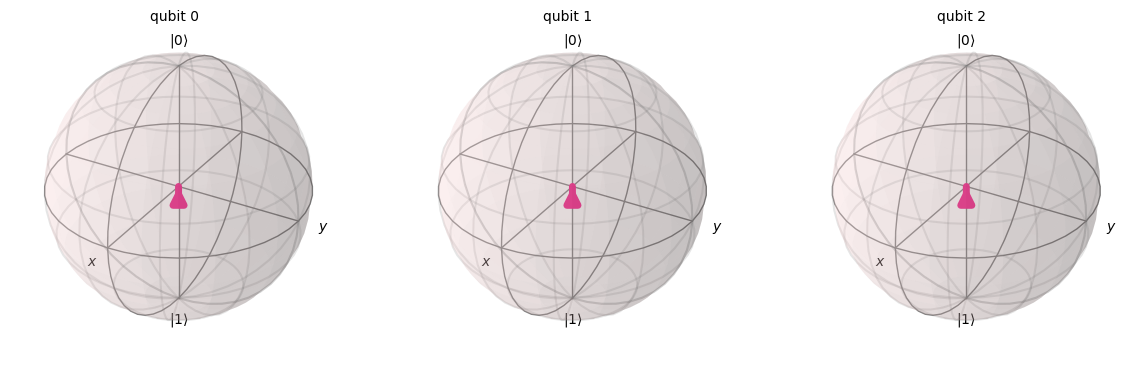

In [26]:
# Create the 3-qubit phase flip code circuit before error correction
phaseflip_circuit_before = create_3qubit_phaseflip_circuit()
phaseflip_circuit_before, error_qubit_before = add_error_phase(phaseflip_circuit_before)

# Visualize the Bloch vector before error correction
visualize_bloch_vector(phaseflip_circuit_before)


Without the error correction method, the qubits are in their superposition states, which should be visualized with the pink arrow that is pointing at a direction that is a linear combination of the $|0 \rangle$ and $|1 \rangle$ states.

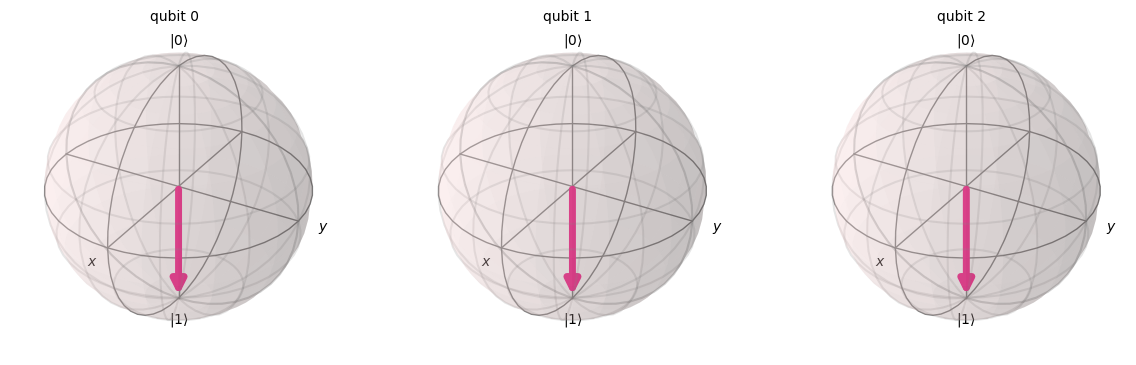

In [28]:
# Create the 3-qubit phase flip code circuit after error correction
phaseflip_circuit_after = create_3qubit_phaseflip_circuit()

# Add error to the circuit
phaseflip_circuit_after, error_qubit_after = add_error_phase(phaseflip_circuit_after)

# Measure and correct errors
phaseflip_circuit_after = measure_and_correct_phase(phaseflip_circuit_after, error_qubit_after)

# Visualize the Bloch vector after error correction
visualize_bloch_vector(phaseflip_circuit_after)



With the error correction method implemented, now our states are either $|0 \rangle$s or $|1 \rangle$s, once again marked by the pink state vector.

Fun activity: If you re-run the error correction cell without re-running the earlier cells you can see how the phase flip code flips the state of a qubit between $|0 \rangle$ and $|1 \rangle$. You can also see how the error syndromes affect the flipping by considering which signs multiplied give which signs and observing what P values are constant as you re-run the code. 

# Stabilizer Codes

Stabilizer formalism is a powerful approach in quantum error correction, particularly in the context of stabilizer quantum codes like the Calderbank-Shor-Steane (CSS) codes and surface codes, both of which will be explained in detail later in this tutorial. In this framework, logical qubits are redundantly encoded using stabilizer generators, which are Pauli operators. The stabilizer group, denoted as \(S\), is generated by a set of commuting Pauli operators ${S_i}$ such that $S_i |\psi\rangle = |\psi\rangle $ for all \(i\), where $|\psi\rangle$ is the logical state and $S_i$ is a product of Pauli operators. The stabilizer generators form a basis for the stabilizer group, and the logical subspace is the joint +1 eigenstate of all stabilizer generators. Errors are detected by measuring the parity of these stabilizer operators, and correction is applied accordingly. This formalism provides the foundation for stabilizer codes, which we will be demonstrating next.


The Shor code is able to protect against phase flip and bit flip errors on any qubit. To see this, suppose a bit flip occurs on the first qubit. As for the bit flip code, we perform a measurement of Z1Z2 comparing the first two qubits, and find that they are different. We conclude that a bit flip error occurred on the first or second qubit. Next we compare the second and third qubit by performing a measurement of Z2Z3. We find that they are the same, so it could not have been the second qubit which flipped. We conclude that the first qubit must have flipped, and recover from the error by flipping the first qubit again, back to its original state. In a similar way we can detect and recover from the effects of bit flip errors on any of the nine qubits in the code.
We cope in a similar manner with phase flips on the qubits. Suppose a phase flip occurs on the first qubit. Such a phase flip flips the sign of the first block of qubits, changing |000⟩ + |111⟩ to |000⟩ − |111⟩, and vice versa. Indeed, a phase flip on any of the first three qubits has this effect, and the error-correction procedure we describe works for any of these three possible errors. Syndrome measurement begins by comparing the sign of the first and second blocks of three qubits, just as syndrome measurement for the phase flip code began by comparing the sign of the first and second qubits. For example, (|000⟩ − |111⟩)(|000⟩ − |111⟩) has the same sign (−) in both blocks of qubits, while (|000⟩ − |111⟩)(|000⟩ + |111⟩) has different signs. When a phase flip occurs on any of the first three qubits we find that the signs of the first and second blocks are different. The second and final stage of syndrome measurement is to compare the sign of the second and third blocks of qubits. We find that these are the same, and conclude that the phase must have flipped in the first block of three qubits. We recover from this by flipping the sign in the first block of three qubits back to its original value. We can recover from a phase flip on any of the nine qubits in a similar manner.

Suppose both bit and phase flip errors occur on the first qubit, that is, the operator Z1X1 is applied to that qubit. Then it is easy to see that the procedure for detecting a bit flip error will detect a bit flip on the first qubit, and correct it, and the procedure for detecting a phase flip error will detect a phase flip on the first block of three qubits, and correct it. Thus, the Shor code also enables the correction of combined bit and phase flip errors on a single qubit.

Now, we're going to implement the Shor code, an example of a Stabilizer code. We first start by visualizing the encoding circuit of the 9-qubit Shor code.

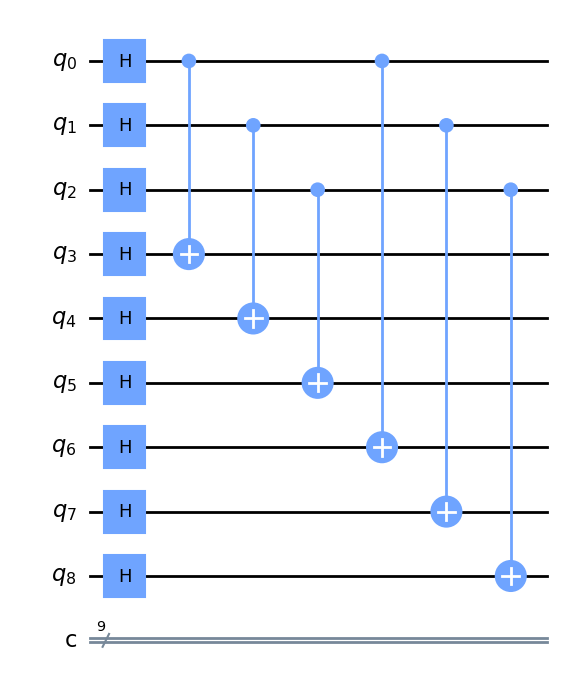

In [48]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

# Function to create a 9-qubit Shor code circuit
def create_9qubit_shor_code_circuit():
    # Create a quantum register with 9 qubits
    q = QuantumRegister(9, 'q')
    
    # Create a classical register with 9 bits to measure the qubits
    c = ClassicalRegister(9, 'c')
    
    # Create a quantum circuit using the registers
    qc = QuantumCircuit(q, c)
    
    # Apply Hadamard gate to all qubits
    qc.h(q)
    
    # Apply controlled-X gates for encoding
    for i in range(3):
        qc.cx(q[i], q[i + 3])
        qc.cx(q[i], q[i + 6])
    
    return qc

# Function to add a bit flip error (X gate) to a random qubit
def add_bit_error_shor(circuit):
    import random
    
    # Choose a random qubit to apply an X gate
    error_qubit = random.choice(range(9))
    
    # Apply X gate to introduce an error on the chosen qubit
    circuit.x(error_qubit)
    
    return circuit, error_qubit

#Function to add a phase error (Z gate) to a random qubit
def add_phase_error_shor(circuit):
    import random
    
    # Choose a random qubit to apply a Z gate
    error_qubit = random.choice(range(9))
    
    # Apply Z gate to introduce a phase flip error on the chosen qubit
    circuit.z(error_qubit)
    
    return circuit, error_qubit

# Function to measure qubits
def measure_shor(circuit):
    # Measure all qubits
    circuit.measure(circuit.qregs[0], circuit.cregs[0])
    
    return circuit

# Function to measure qubits and apply error correction for the Shor code
def measure_and_correct_shor(circuit, error_qubit):
    # Measure all qubits
    circuit.measure(circuit.qregs[0], circuit.cregs[0])
    
    # Apply error correction based on the measurement results
    for i in range(9):
        # Bit flip error correction
        if circuit.cregs[0][i] == 1:
            circuit.x(i)
        
        # Phase error correction
        if circuit.cregs[0][i] == 1 and i != error_qubit:
            circuit.z(i)
    
    return circuit

# Function to simulate the quantum circuit for counts
def simulate_circuit_shor(circuit, shots=1024):
    # Use the Aer simulator
    simulator = Aer.get_backend('qasm_simulator')
    # Execute the circuit and get the result
    result = execute(circuit, simulator, shots=shots).result()
    # Get the counts from the result
    counts = result.get_counts(circuit)
    return counts

# Function to visualize counts
def visualize_counts(counts):
    return plot_histogram(counts)

# Function to visualize Bloch vector
def visualize_bloch_vector(circuit):
    simulator = Aer.get_backend('statevector_simulator')
    result = execute(circuit, simulator).result()
    state_vector = result.get_statevector()
    return plot_bloch_multivector(state_vector)

# Create the 9-qubit Shor code circuit
shor_circuit = create_9qubit_shor_code_circuit()

# Display the circuit
shor_circuit.draw(output='mpl')


Next, we introduce a bit-flip error to the system and see the new circuit with the applied error (X-gate) and measurements.

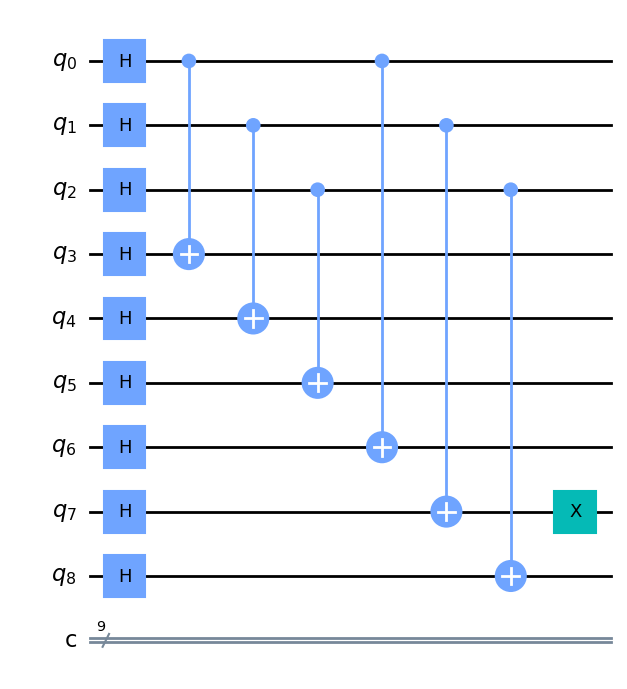

In [49]:
# Create the 9-qubit Shor code circuit before error correction
shor_circuit_before = create_9qubit_shor_code_circuit()
shor_circuit_before, error_qubit_before = add_bit_error_shor(shor_circuit_before)

# Display the circuit before error correction
shor_circuit_before.draw(output='mpl')

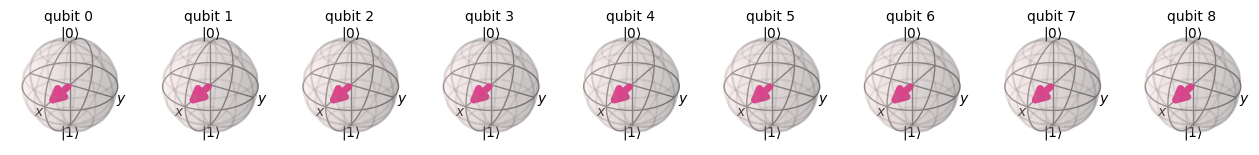

In [50]:
# Visualize Bloch vector before error correction
visualize_bloch_vector(shor_circuit_before)


We can see that before the bit-flip correction our states are not at 0 or 1 but instead are a superposition of the two. The bit-flip correction will ensure that we have the appropriate 0 or 1 measurements for each qubit.

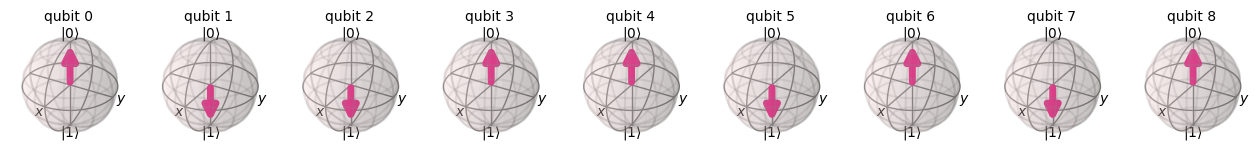

In [51]:
# Measure and correct
shor_circuit_after = measure_and_correct_shor(shor_circuit_before, error_qubit_before)

# Visualize Bloch vector after error correction
visualize_bloch_vector(shor_circuit_after)


Now we have corrected for the bit flip error. Next, we introduce a phase error.

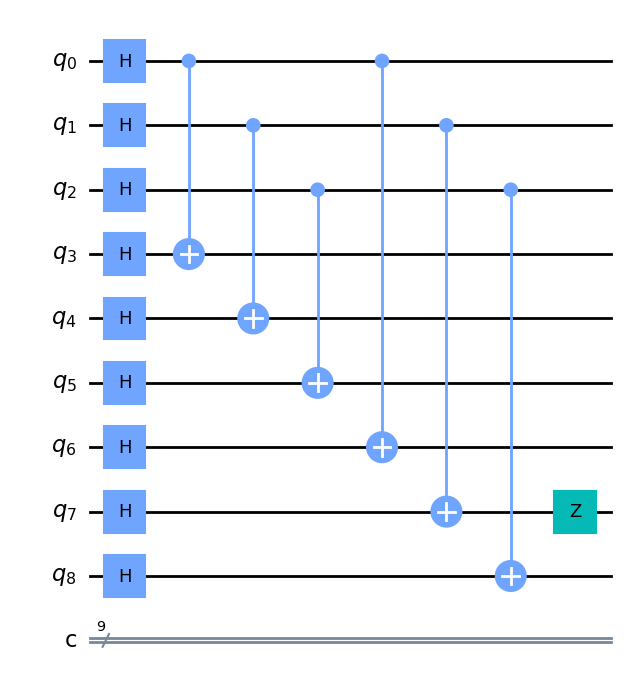

In [52]:
# Create the 9-qubit Shor code circuit before error correction
shor_circuit_before = create_9qubit_shor_code_circuit()
shor_circuit_before, error_qubit_before = add_phase_error_shor(shor_circuit_before)

# Display the circuit after error correction
shor_circuit_before.draw(output='mpl')

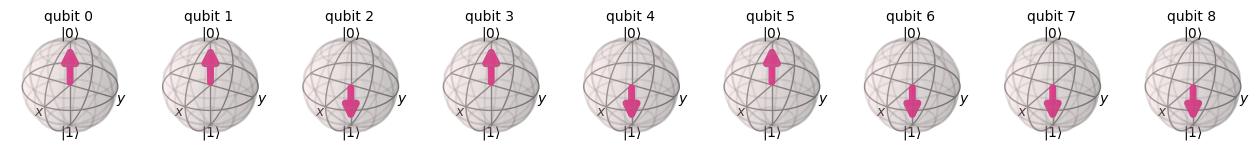

In [54]:
# Visualize Bloch vector after error correction
visualize_bloch_vector(shor_circuit_before)

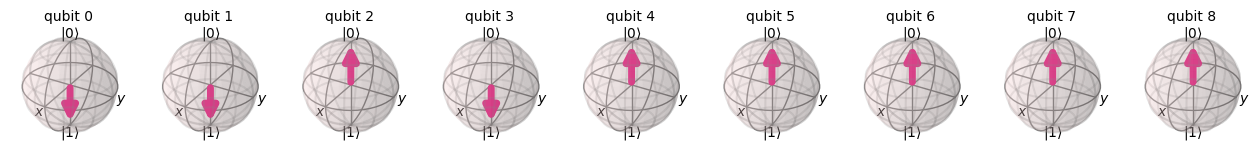

In [55]:
# Measure and correct
shor_circuit_after = measure_and_correct_shor(shor_circuit_before, error_qubit_before)

# Visualize Bloch vector after error correction
visualize_bloch_vector(shor_circuit_after)

Through the previous example we can see that the Shor stabilizer code can correct for both bit flip and phase errors through identifying the error when measured and accounting for both possibilites, which makes it a stronger code for error correction compared to 3-qubit phase flip and 3-qubit bit flip algorithms alone.

## Calderbank– Shor–Steane codes

An important subclass of the more general class of stabilizer codes called the Calderbank– Shor–Steane codes, also known as CSS codes. Summarizing, suppose C1 and C2 are $[n, k1]$ and $[n, k2 ]$ classical linear codes, respectively, such that C2 ⊂ C1, and both C1 and C2⊥ can correct errors on up to t bits. Then CSS(C1,C2) is an $[n,k1 -k2]$ quantum error-correcting code which can correct arbitrary errors on up to t qubits. Furthermore, the error-detection and correction steps require only the application of Hadamard and controlled gates, in each case a number linear in the size of the code, which make CSS one of the more desirable algorithms in demonstrating quantum supremacy.


Four our next example we will be looking at a 7-qubit CSS code. We initially apply Hadamard gates to all qubits, followed by controlled-X gates for encoding. The encoded state |0⟩ is a superposition of even codewords in the Hamming code, while the encoded state |1⟩ is a superposition of odd codewords in the Hamming code. (For a review of the Hamming code, if the reader is not familiar with it or would appreciate a refresher on the concept, 
https://users.math.msu.edu/users/halljo/classes/codenotes/Hamming.pdf is a great resource in the form of class notes.) This behavior is typical of CSS codes, where various quantum codewords are superpositions of words in subcodes of classical codes, as we talked about in the earlier paragraph. The stabilizer measurements for error detection and correction involve applying X and Z gates on specific qubits according to a set of stabilizer operators. The stabilizer matrix is given below, taken from Daniel Gottesman's PhD thesis on Stabilizer Algorithms. In the code blow, the 7-qubit CSS code introduces a stabilizer measurement approach, applies random errors, and visualizes the resulting circuits and Bloch vectors similar to the structure that was followed in earlier examples.

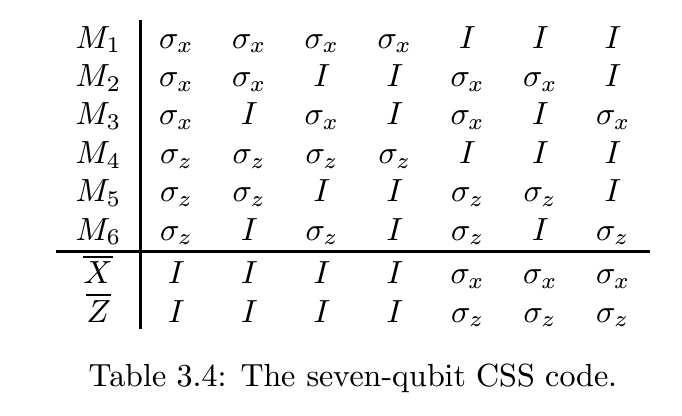

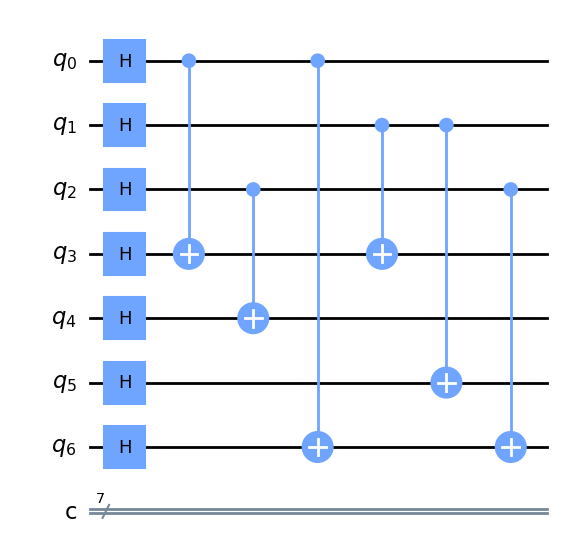

In [62]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Function to create a 7-qubit CSS code circuit
def create_7qubit_css_code_circuit():
    # Create a quantum register with 7 qubits
    q = QuantumRegister(7, 'q')
    
    # Create a classical register with 7 bits to measure the qubits
    c = ClassicalRegister(7, 'c')
    
    # Create a quantum circuit using the registers
    qc = QuantumCircuit(q, c)
    
    # Apply Hadamard gate to all qubits
    qc.h(q)
    
    # Apply controlled-X gates for encoding
    qc.cx(q[0], q[3])
    qc.cx(q[0], q[6])
    qc.cx(q[1], q[3])
    qc.cx(q[1], q[5])
    qc.cx(q[2], q[4])
    qc.cx(q[2], q[6])
    
    return qc

# Stabilizer Measurements
stabilizer_measurements = [
    (['X', 'X', 'X', 'X', 'I', 'I', 'I'], []),
    (['X', 'X', 'I', 'I', 'X', 'X', 'I'], []),
    (['X', 'I', 'X', 'I', 'X', 'I', 'X'], []),
    (['Z', 'Z', 'Z', 'Z', 'I', 'I', 'I'], []),
    (['Z', 'Z', 'I', 'I', 'Z', 'Z', 'I'], []),
    (['Z', 'I', 'Z', 'I', 'Z', 'I', 'Z'], [])
]

# Function to add a stabilizer measurement
def add_stabilizer_measurement(circuit, measurement):
    for i, gate in enumerate(measurement[0]):
        if gate == 'X':
            circuit.h(i)
        elif gate == 'Z':
            circuit.s(i)
            circuit.h(i)
    
    for qubit in measurement[1]:
        circuit.cx(qubit[0], qubit[1])
        
# Apply a random error to the CSS code circuit
def apply_random_error(css_circuit):
    # Choose a random error type (bit flip or phase flip)
    error_type = random.choice(['X', 'Z'])
    
    # Choose a random qubit to apply the error
    error_qubit = random.choice(range(7))
    
    # Apply the error to the chosen qubit
    if error_type == 'X':
        css_circuit.x(error_qubit)
    elif error_type == 'Z':
        css_circuit.z(error_qubit)
    
    return css_circuit, error_type, error_qubit

# Function to measure and correct errors for the CSS code
def measure_and_correct_css(circuit):
    # Measure all qubits
    circuit.measure(circuit.qregs[0], circuit.cregs[0])
    
    # Apply error correction based on the stabilizer measurements
    for measurement in stabilizer_measurements:
        add_stabilizer_measurement(circuit, measurement)
    
    return circuit

# Function to simulate the quantum circuit for counts
def simulate_circuit_css(circuit, shots=1024):
    # Use the Aer simulator
    simulator = Aer.get_backend('qasm_simulator')
    # Execute the circuit and get the result
    result = execute(circuit, simulator, shots=shots).result()
    # Get the counts from the result
    counts = result.get_counts(circuit)
    return counts

# Function to visualize counts
def visualize_counts(counts):
    return plot_histogram(counts)

# Function to visualize Bloch vector
def visualize_bloch_vector(circuit):
    simulator = Aer.get_backend('statevector_simulator')
    result = execute(circuit, simulator).result()
    state_vector = result.get_statevector()
    return plot_bloch_multivector(state_vector)

# Create the 7-qubit CSS code circuit
css_circuit = create_7qubit_css_code_circuit()

# Display the circuit
css_circuit.draw(output='mpl')


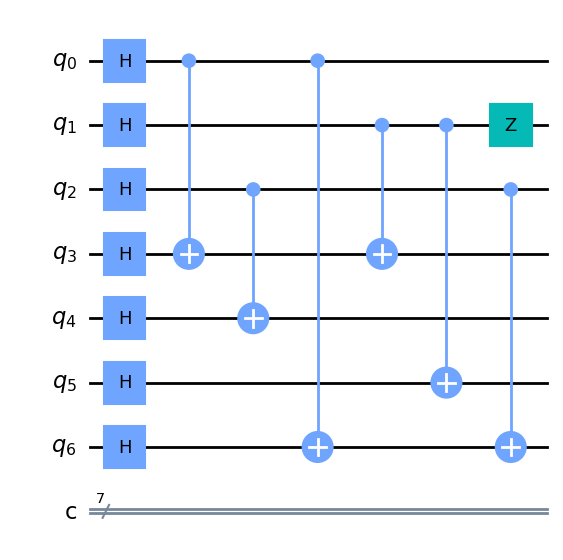

In [71]:
# Apply a random error to the CSS code circuit
css_circuit_with_error, error_type, error_qubit = apply_random_error(css_circuit.copy())

# Visualize the circuit with the applied error
css_circuit_with_error.draw(output='mpl', plot_barriers=False)

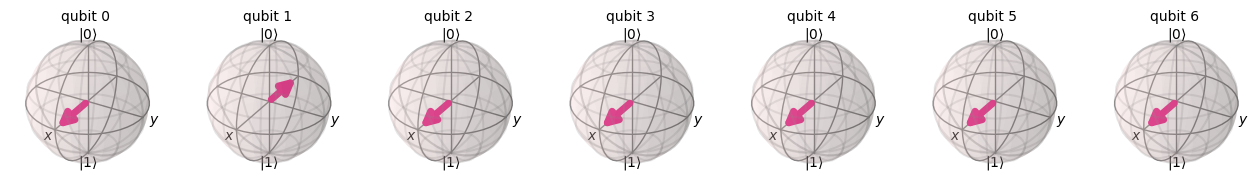

In [72]:
# Visualize the Bloch vector for the circuit with the applied error
visualize_bloch_vector(css_circuit_with_error)

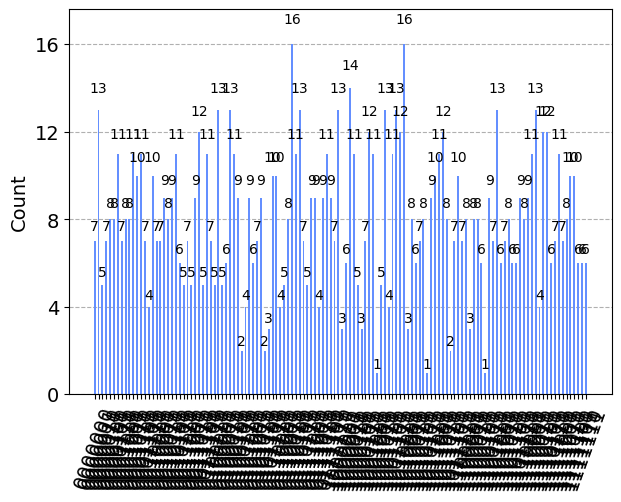

In [75]:
# Measure and correct errors in the circuit
css_circuit_after = measure_and_correct_css(css_circuit_with_error)

# Simulate the circuit with the applied error for counts
counts = simulate_circuit_css(css_circuit_after)

# Visualize the measurement outcomes
visualize_counts(counts)

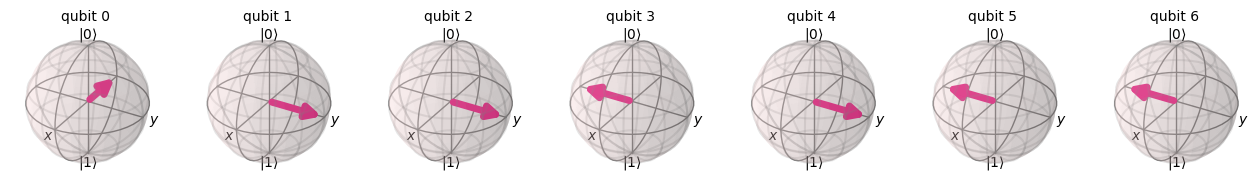

In [76]:
# Visualize the Bloch vector for the circuit with error correction
visualize_bloch_vector(css_circuit_after)

# Surface Codes

Now that we have a more clear understanding of stabilizers, we can move to the final part of this tutorial: surface codes. Surface Codes are a family of quantum error-correcting codes that encode a logical qubit into the joint entangled state of a $d * d$ square of physical qubits, referred to as data qubits. The logical qubit states are defined by a pair of anti-commuting logical observables $X_L$ and $Z_L$.
Below are visual representations of surface codes with distance d = 3 and d = 5. Qubits and stabilizers are located at sites and faces respectively. A stabilizer Bf located on a face f applies X (black faces) or Z (white faces) to each qubit on the boundary of f. Logical Pauli operators $X_L$ (red) and $Z_L$ (blue) have support on the left and the top boundary.

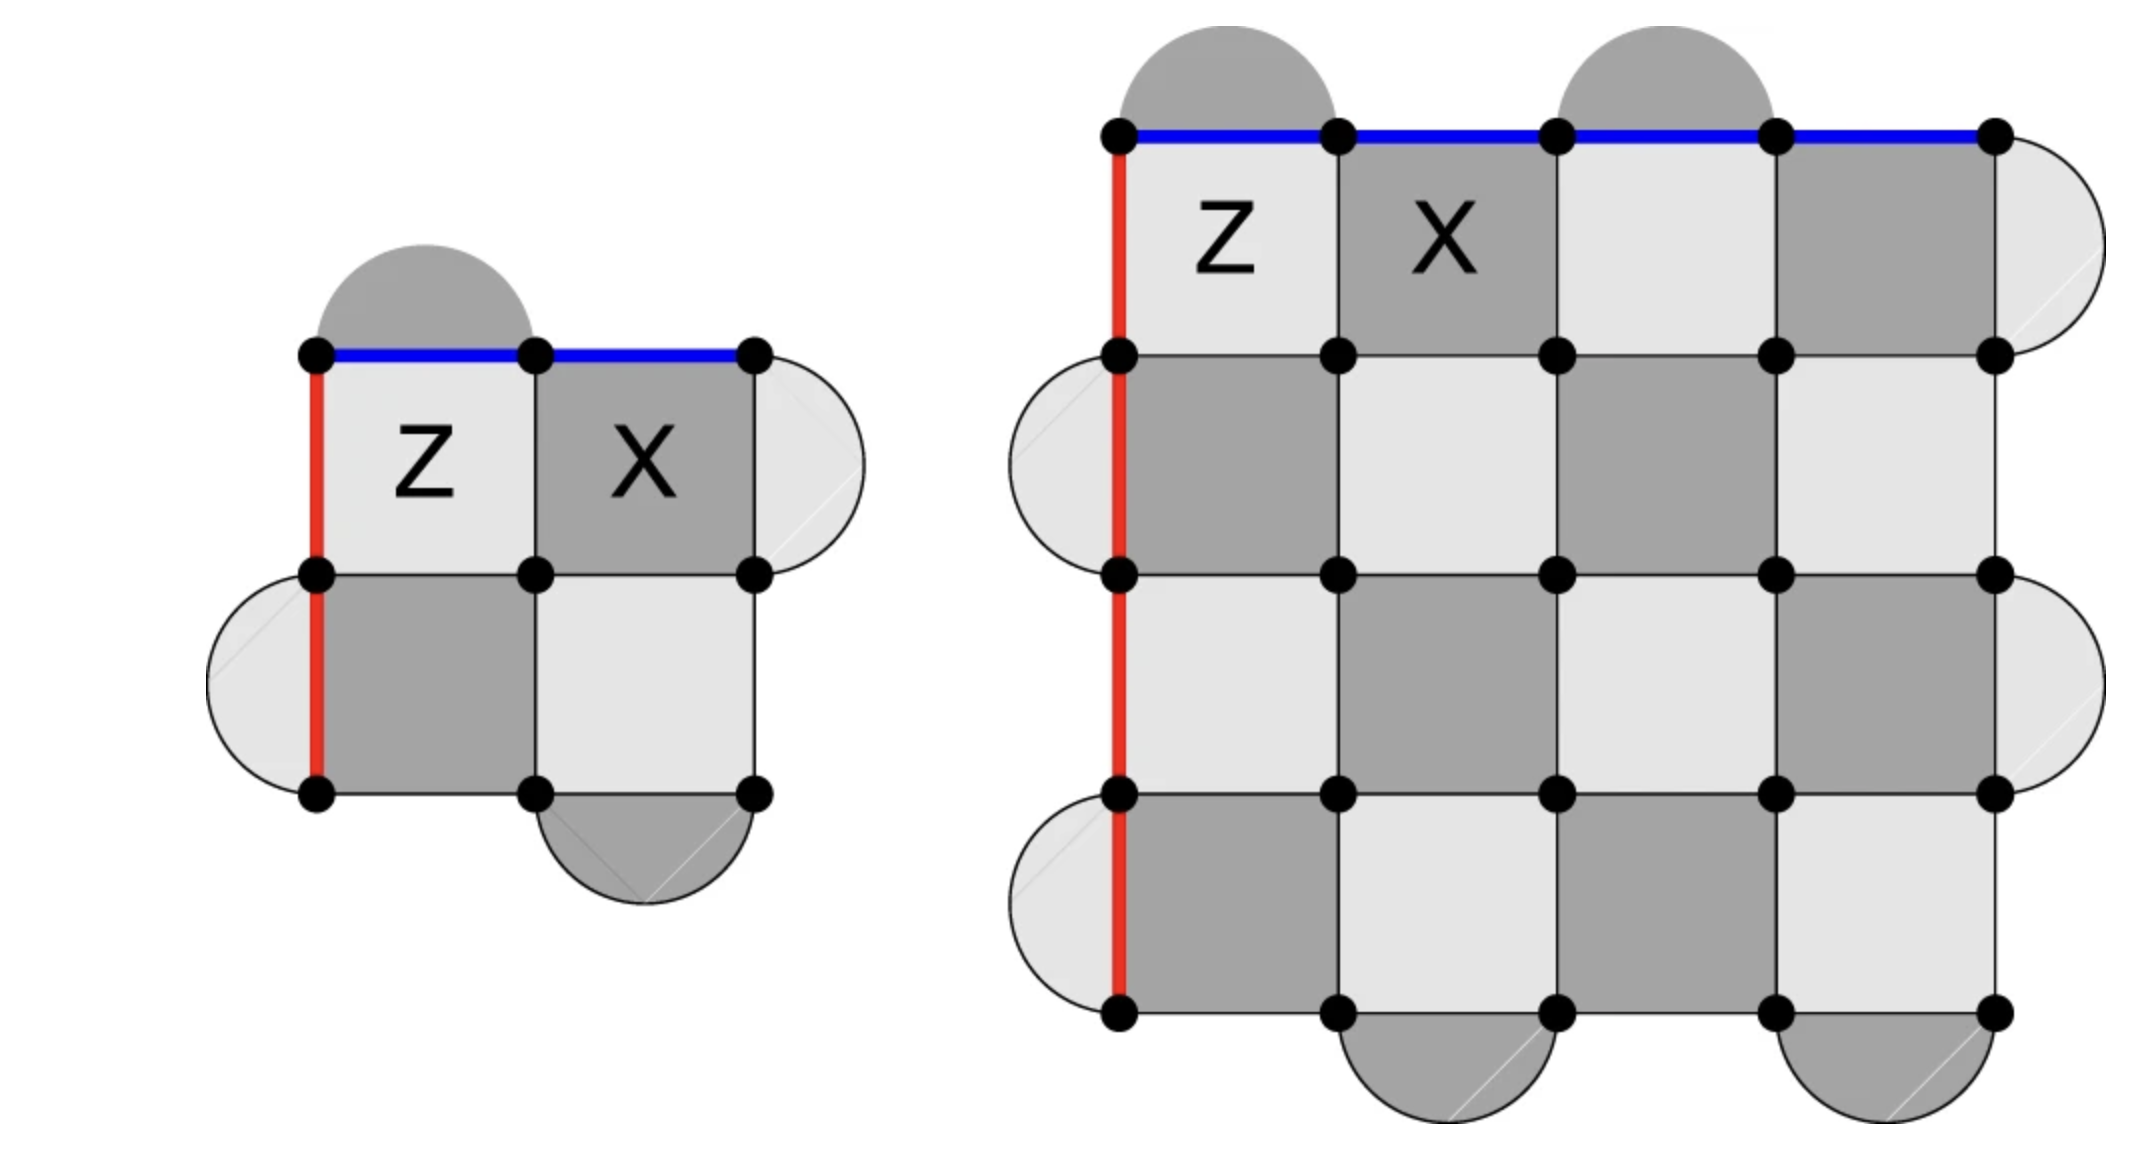

Bravyi, S., Englbrecht, M., König, R. et al. Correcting coherent errors with surface codes. npj Quantum Inf 4, 55 (2018).

Note: The paper cited above is not only the reference for the figure but also a helpful read for those who want to learn more about surface codes and their applications in quantum information research.

As we can see above, surface codes are 2D lattices, while the previous examples we worked on such as Shor's code and the 7-qubit CSS code operate in a 1D array. We also have established that quantum error correction heavily depends on redundancy, which creates a large overhead in terms of computational cost. Surface codes typically have a lower overhead, as they can achieve fault-tolerant quantum computation with a lower physical qubit-to-logical qubit ratio compared to most 1D codes. Next, we're going to create a topological circuit that creates a d=3 lattice. Introducing the error to the surface code and correcting it is outside the scope of the tutorial but hopefully seeing the topological circuit will help explain the idea behind surface codes better. 

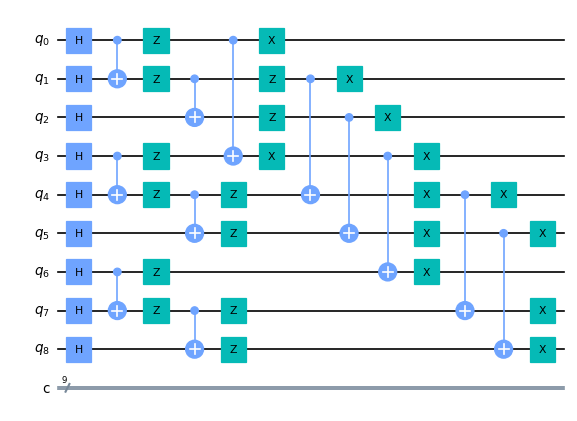

In [83]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

# Create a 3x3 toric code lattice
def toric_code_3x3():
    # Create a quantum circuit
    qc = QuantumCircuit(9, 9)

    # Create data qubits
    for i in range(3):
        for j in range(3):
            qc.h(3 * i + j)

    # Create stabilizer generators X
    for i in range(3):
        for j in range(2):
            qc.cx(3 * i + j, 3 * i + j + 1)
            qc.z(3 * i + j)
            qc.z(3 * i + j + 1)

    # Create stabilizer generators Z
    for i in range(2):
        for j in range(3):
            qc.cx(3 * i + j, 3 * i + j + 3)
            qc.x(3 * i + j)
            qc.x(3 * i + j + 3)

    return qc

# Create the 3x3 Toric Code circuit
toric_circuit = toric_code_3x3()

# Display the circuit
toric_circuit.draw('mpl', scale=0.6)


In order for us to be able to use this circuit to implement a toric error correction code we would need to add error gates and ancilla qubits for syndrome extraction. The work done by Shantanu Jha, Amir Ebrahimi and Jeffrey Gong at the IBM Qiskit - Summer Jam Hackathon 2020 under James Wootton's mentorship is available at https://github.com/yaleqc/qtcodes/tree/master, for those who are interested in the decoding of surface codes and implementations. Remember, the example we did is a toric code example, which is an example of a surface code with periodic boundary conditions yet there are many other e